In [7]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline
import os
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


#Binomial

In [8]:
#Generating arrays

narray = range(1,101,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))

In [9]:
#Filling in arrays 

for i,n in enumerate(narray):
    p=50 
    dist = np.random.binomial(n, 0.5, 1000)
    ks_b[i] = scipy.stats.kstest(dist,'norm')[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    mybins=np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
    kl_b [i] = scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters)+n)

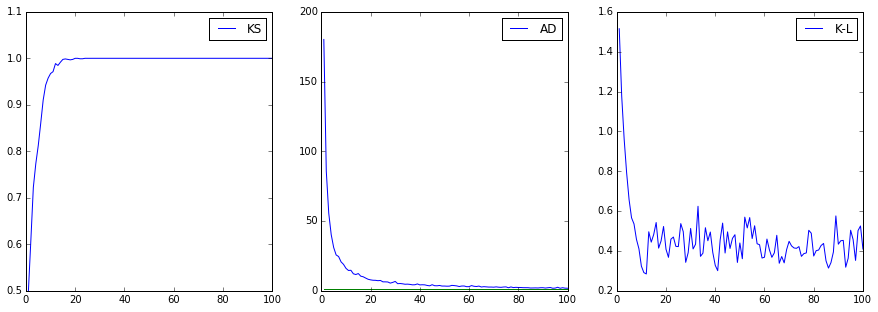

In [10]:
#Drawing the charts 

dist_n = np.random.randn(1000)
threshold = scipy.stats.anderson(dist_n, dist='norm')[1][scipy.stats.anderson(dist_n, dist='norm')[2]==[1.0]]

fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')

pl.legend()

KS: An increasing KS value indicates that, as the mean of the binomial samples increases, it becomes easier to reject the hypothesis that the sample follows a Normal distribution.
AD: A decreasing AD value indicates that, as the mean of the binomial samples increases, it becomes harder to reject the hypothesis that the sample follows a Normal distribution.
KL: A decreasing KL indicates the divergence to the Normal decreases as the mean of the binomial sample increases.

#Poisson

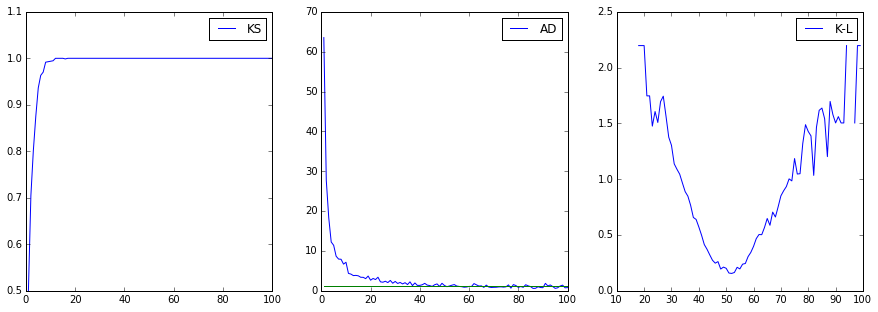

In [12]:
#Doing the same for Poisson

p_narray = range(1,101,1)
p_ks_b = np.zeros(len(narray))
p_ad_b = np.zeros(len(narray))
p_kl_b = np.zeros(len(narray))

for i,n in enumerate(narray): 
    p_dist = np.random.poisson(n, 1000)
    p_ks_b[i] = scipy.stats.kstest(p_dist,'norm')[0]
    p_ad_b[i] = scipy.stats.anderson(p_dist, dist='norm')[0]
    p_kl_b [i] = scipy.stats.entropy(np.histogram(p_dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters)+n)
    
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(p_narray, p_ks_b, label='KS')
pl.legend()

fig.add_subplot(132)
pl.plot(p_narray, p_ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(p_narray, p_kl_b, label='K-L ')

pl.legend()

KS: An increasing KS value indicates that, as the mean of the binomial samples increases, it becomes easier to reject the hypothesis that the sample follows a Normal distribution.
AD: A decreasing AD value indicates that, as the mean of the binomial samples increases, it becomes harder to reject the hypothesis that the sample follows a Normal distribution.
KL: A decreasing KL indicates the divergence to the Normal decreases as the mean of the binomial sample reaches the mid of the samples, and increases in the second half of the samples.